In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)

In [20]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [21]:
x_train = train_datagen.flow_from_directory(r"D:\Flowers-Dataset\Flowers",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [22]:
x_test = test_datagen.flow_from_directory(r"D:\Flowers-Dataset\Flowers",target_size = (64,64),
                                                                                      class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [23]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing import image
import numpy as np

In [25]:
model=Sequential()

In [26]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [28]:
model.add(Dense(5,activation='softmax'))
len(x_train)

180

In [29]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
180/180 [==============================] - 35s 191ms/step - loss: 1.2909 - accuracy: 0.4658 - val_loss: 1.0964 - val_accuracy: 0.5627
Epoch 2/10
180/180 [==============================] - 33s 184ms/step - loss: 1.0320 - accuracy: 0.5874 - val_loss: 0.9690 - val_accuracy: 0.6289
Epoch 3/10
180/180 [==============================] - 34s 187ms/step - loss: 0.9785 - accuracy: 0.6085 - val_loss: 1.0085 - val_accuracy: 0.6032
Epoch 4/10
180/180 [==============================] - 33s 185ms/step - loss: 0.8976 - accuracy: 0.6474 - val_loss: 0.8576 - val_accuracy: 0.6590
Epoch 5/10
180/180 [==============================] - 33s 181ms/step - loss: 0.8442 - accuracy: 0.6697 - val_loss: 0.9227 - val_accuracy: 0.6264
Epoch 6/10
180/180 [==============================] - 34s 192ms/step - loss: 0.8338 - accuracy: 0.6722 - val_loss: 1.0565 - val_accuracy: 0.6046
Epoch 7/10
180/180 [==============================] - 34s 188ms/step - loss: 0.7881 - accuracy: 0.6901 - val_loss: 0.7395 - val_ac

In [31]:
model.save('flowers.h5')

In [36]:
img=image.load_img(r'D:\Flowers-Dataset\Flowers\dandelion\160456948_38c3817c6a_m.jpg')

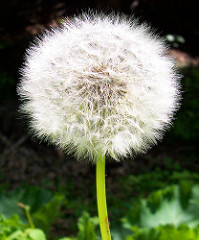

In [37]:
img

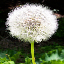

In [38]:
img=image.load_img(r'D:\Flowers-Dataset\Flowers\dandelion\160456948_38c3817c6a_m.jpg',target_size=(64,64))
img

In [39]:
x=image.img_to_array(img)
x

array([[[  3.,   3.,   1.],
        [  2.,   2.,   0.],
        [  2.,   2.,   0.],
        ...,
        [  2.,   1.,   0.],
        [  2.,   1.,   0.],
        [  2.,   1.,   0.]],

       [[  3.,   2.,   0.],
        [  4.,   3.,   1.],
        [  4.,   3.,   1.],
        ...,
        [  3.,   2.,   0.],
        [  2.,   1.,   0.],
        [  2.,   1.,   0.]],

       [[  3.,   4.,   0.],
        [  3.,   3.,   1.],
        [  4.,   4.,   4.],
        ...,
        [  1.,   1.,   1.],
        [  3.,   2.,   0.],
        [  5.,   1.,   0.]],

       ...,

       [[125., 171.,  72.],
        [ 96., 160.,  22.],
        [104., 161.,  46.],
        ...,
        [149., 198.,  10.],
        [ 85., 136.,   5.],
        [ 76., 137.,   0.]],

       [[ 77., 126.,   8.],
        [ 97., 152.,   6.],
        [ 33.,  90.,   0.],
        ...,
        [151., 199.,   3.],
        [117., 168.,   5.],
        [ 86., 146.,   0.]],

       [[ 92., 145.,   3.],
        [129., 184.,   0.],
        [152., 2

In [42]:
x=np.expand_dims(x,axis=0)
x

array([[[[  3.,   3.,   1.],
         [  2.,   2.,   0.],
         [  2.,   2.,   0.],
         ...,
         [  2.,   1.,   0.],
         [  2.,   1.,   0.],
         [  2.,   1.,   0.]],

        [[  3.,   2.,   0.],
         [  4.,   3.,   1.],
         [  4.,   3.,   1.],
         ...,
         [  3.,   2.,   0.],
         [  2.,   1.,   0.],
         [  2.,   1.,   0.]],

        [[  3.,   4.,   0.],
         [  3.,   3.,   1.],
         [  4.,   4.,   4.],
         ...,
         [  1.,   1.,   1.],
         [  3.,   2.,   0.],
         [  5.,   1.,   0.]],

        ...,

        [[125., 171.,  72.],
         [ 96., 160.,  22.],
         [104., 161.,  46.],
         ...,
         [149., 198.,  10.],
         [ 85., 136.,   5.],
         [ 76., 137.,   0.]],

        [[ 77., 126.,   8.],
         [ 97., 152.,   6.],
         [ 33.,  90.,   0.],
         ...,
         [151., 199.,   3.],
         [117., 168.,   5.],
         [ 86., 146.,   0.]],

        [[ 92., 145.,   3.],
       

In [43]:
y=np.argmax(model.predict(x),axis=1)
y

array([0], dtype=int64)

In [44]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [45]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [46]:
index[y[0]]

'daisy'